In [6]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import Runge_Kutta_Sistema

$$
\frac{dx}{dt} = s(y - x) \\
\frac{dy}{dt} = rx - y - xz \\
\frac{dz}{dt} = xy - bz
$$


In [7]:
def F(X, t, p):
    return np.array([p[0]*(X[0]-X[1]),
                     p[1]*X[0] - X[1] - X[0]*X[2],
                     X[0]*X[1] - p[2]*X[2]],dtype=float)


X0 = np.array([1, 0.5, 0.1])
p = np.array([10,28,8/3])
inter = [0,10]

sols = Runge_Kutta_Sistema(fun=F, 
                           interval=inter, 
                           X0=X0, 
                           h=0.01, 
                           p=p)

C:\Users\pedro\AppData\Local\Temp\ipykernel_11840\3627982271.py:3: RuntimeWarning: overflow encountered in scalar multiply
  p[1]*X[0] - X[1] - X[0]*X[2],
C:\Users\pedro\AppData\Local\Temp\ipykernel_11840\3627982271.py:4: RuntimeWarning: overflow encountered in scalar multiply
  X[0]*X[1] - p[2]*X[2]],dtype=float)
C:\Users\pedro\AppData\Local\Temp\ipykernel_11840\3627982271.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  X[0]*X[1] - p[2]*X[2]],dtype=float)
C:\Users\pedro\AppData\Local\Temp\ipykernel_11840\3627982271.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([p[0]*(X[0]-X[1]),
C:\Users\pedro\AppData\Local\Temp\ipykernel_11840\3627982271.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  p[1]*X[0] - X[1] - X[0]*X[2],
c:\Users\pedro\OneDrive\Desktop\LMA\Neural-Networks\DifferentialEquations\solvers.py:53: RuntimeWarning: invalid value encountered in add
  X_i += (F1 + 2*F2 + 2*F3 + F4)/6


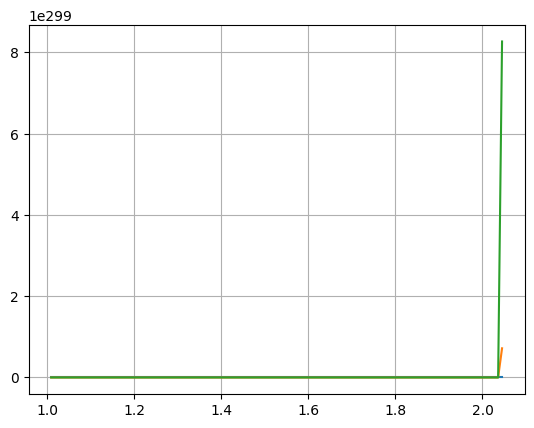

In [8]:
fig, ax = plt.subplots(1,1)
x = np.linspace(1,10,1000)
ax.plot(x, sols[:,0])
ax.plot(x, sols[:,1])
ax.plot(x, sols[:,2])
ax.grid()
plt.show()

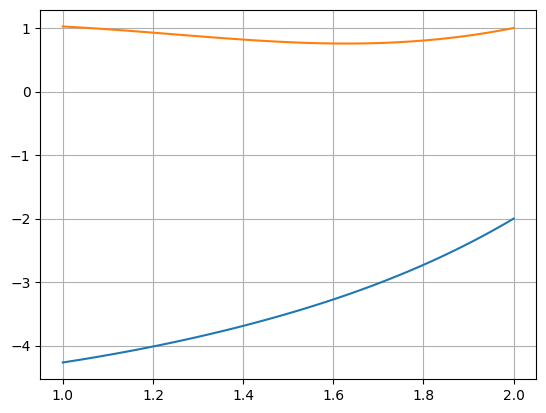

In [4]:
fun1 = lambda x1, x2, t: x1**(-2) + np.log(x2) + t**2
fun2 = lambda x1, x2, t: np.exp(x2) - np.cos(x1) + np.sin(t)*x1 - (x1*x2)**(-3)

def F(t, X):
    return np.array([fun1(X[0], X[1], t), fun2(X[0], X[1], t)])

def Runge_Kutta_Sistema(v_fun, interval, X0, h):
    X_i = X0
    t_i = interval[-1]
    its =  int(np.abs(interval[0] - interval[1]) / np.abs(h))
    sol = [X0]

    for _ in range(its - 1):
        F1 = h*v_fun(t_i, X_i)
        F2 = h*v_fun(t_i + h/2, X_i + F1/2)
        F3 = h*v_fun(t_i + h/2, X_i + F2/2)
        F4 = h*v_fun(t_i + h, X_i + F3)
        X_i += (F1 + 2*F2 + 2*F3 + F4)/6
        t_i += h
        sol.append(X_i.tolist())
    return np.array(sol)

sols = Runge_Kutta_Sistema(F, [1,2], [-2,1], -0.01)
fig, ax = plt.subplots(1,1)
x = np.linspace(1,2,100)
ax.plot(x, np.flip(sols[:,0]))
ax.plot(x, np.flip(sols[:,1]))
ax.grid()
plt.show()